# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Features and Target

In [3]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1]

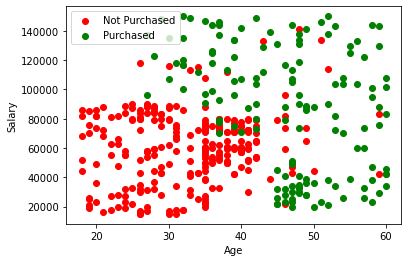

In [4]:
plt.scatter(X[y==0,0],X[y==0,1],label="Not Purchased",color='red')
plt.scatter(X[y==1,0],X[y==1,1],label="Purchased",color='green')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

# Feature Scaling 

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

# Train test split

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=0)

# Model creation

In [7]:
from sklearn.svm import SVC


In [8]:
model = SVC()
model.fit(X_train,y_train)

SVC()

# Model Validatoin

Training and Testing Accuracy

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test,y_pred)
test_acc

0.93

In [10]:
y_pred1 = model.predict(X_train)
train_acc = accuracy_score(y_train,y_pred1)
train_acc

0.9066666666666666

# Model Visualization

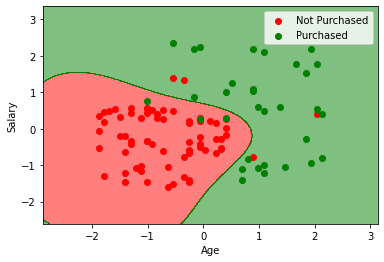

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test


X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))


plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],label="Not Purchased",color='red')
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],label="Purchased",color='green')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

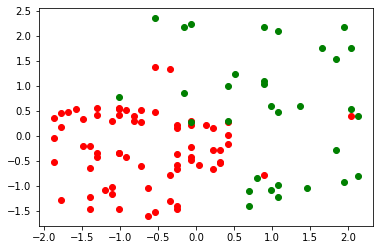

In [12]:
plt.scatter(x=X_set[y_set==0,0],y=X_set[y_set==0,1],color="red")
plt.scatter(x=X_set[y_set==1,0],y=X_set[y_set==1,1],color="green")

# K-Fold Testing

In [13]:
from sklearn.model_selection import KFold


In [14]:
from sklearn.model_selection import cross_val_score
fold = KFold(n_splits=10,shuffle=True)

model1 = SVC()

results = cross_val_score(model1, x, y, cv=fold)

In [15]:
results.mean()

0.905

In [16]:
results.std()

0.033166247903554005

# Grid Search (Hyperparameter Tuning)

In [17]:
from sklearn.svm import SVC

In [18]:
model2 = SVC()
para = {'C':[1,10,100],"kernel":['linear','poly','rbf','sigmoid']}

from sklearn.model_selection import GridSearchCV,KFold

grid = GridSearchCV(model2,param_grid = para,cv = KFold(n_splits=10))

In [19]:
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [22]:
grid_result=grid.fit(x,y)

In [23]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.9124999999999999, using {'C': 1, 'kernel': 'rbf'}


In [61]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

0.9049999999999999,0.09205976319760982 with: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50}
0.9025000000000001,0.08400148808205722 with: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}
0.9025000000000001,0.08173891362135907 with: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 150}
0.9049999999999999,0.0864580823289529 with: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 200}
0.89,0.08381527307120105 with: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 50}
0.8925000000000001,0.08219641111386798 with: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100}
0.8950000000000001,0.08276472678623424 with: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 150}
0.8925000000000001,0.07830229881682912 with: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}
0.8875,0.07685213074469699 with: {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 50}
0.8925000000000001,0.0775 with: {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 100}
0

# Final Model

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

fold = KFold(n_splits=10,shuffle=False)

model1 = RandomForestClassifier(n_estimators=150,criterion="entropy",max_depth=6)

results = cross_val_score(model1, X, y, cv=fold)

In [63]:
results

array([0.95 , 0.9  , 0.975, 0.925, 0.95 , 0.7  , 0.925, 0.8  , 0.95 ,
       0.95 ])

In [64]:
results.std()

0.08173891362135907

In [67]:
from sklearn.ensemble import RandomForestClassifier
final_model = RandomForestClassifier(n_estimators=150,criterion="entropy",max_depth=6)
final_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=150)

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = final_model.predict(X_test)
test_acc = accuracy_score(y_test,y_pred)
test_acc

0.93

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred1 = final_model.predict(X_train)
train_acc = accuracy_score(y_train,y_pred1)
train_acc

0.9466666666666667